# Image Information

The main objectives of this module are:

* Manipulate an image with Python, scikit-image and numpy.
* Process images at the pixel level.
* Compute and understand image histograms.
* Understand lossless compression & reconstruction.
* Understand the co-occurrence matrix.
* Use different colour representations.

## 1. Read & write an image

In this exercise, we will simply open an image file, display it, and save a copy. 

**Use the [scikit-image io](https://scikit-image.org/docs/dev/api/skimage.io.html) module to open, show & save a copy of the "camera.jpg" image.**

*Note: we use the **%matplotlib inline** command to display the image in the notebook. It would not be necessary if you execute the code in the terminal or in a standard IDE like PyCharm.*

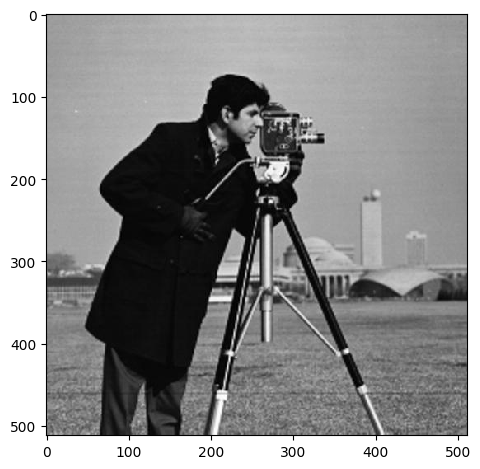

In [3]:
from skimage.io import imread,imsave,imshow
%matplotlib inline

## -- Your code here -- ##
im = imread('camera.jpg')
imshow(im)
imsave('camera_saved.jpg',im)


When you open an image with scikit-image, it is stored as a Numpy [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) object. Numpy arrays are objects which can be easily manipulated for numerical computations.

**Using *ndarray* methods & attributes, answer the following questions about the "camera" image:**

1. What is the shape of the image? (width & height)
1. What is the minimum pixel value? What is the maximum pixel value?
1. What is the data type for each pixel?
1. Show only a 100x100 pixels window taken at the center of the image.

La taille est de  (512, 512)
 Le max est de  255
 Le min est de  0
Le type de data est  uint8


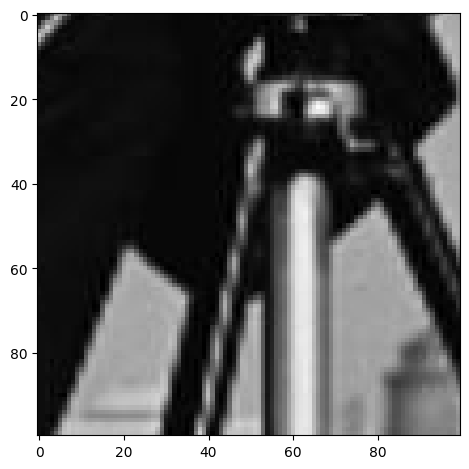

In [4]:
import numpy as np

## -- Your code here -- ##
shape = np.shape(im) #1
max = np.max(im) #2 
min = np.min(im) #3
type = im.dtype

im2 = im[206:306,206:306]
imshow(im2)

print('La taille est de ' , shape)
print(' Le max est de ' , max)
print(' Le min est de ' , min)
print('Le type de data est ', type)

**Need more help? You can check the following videos:**

* [Image I/O](https://www.youtube.com/watch?v=rgJmji4rTpw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=1)
* [Image data type & color channels](https://www.youtube.com/watch?v=rIO1EJ--yeg&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=2)

## 2. Image histograms

* Compute and plot the **histogram** and the **normalized histogram** of the example cameraman image given below.

You can use the [pyplot module](https://matplotlib.org/api/pyplot_api.html) from matplotlib to display plots & histograms.

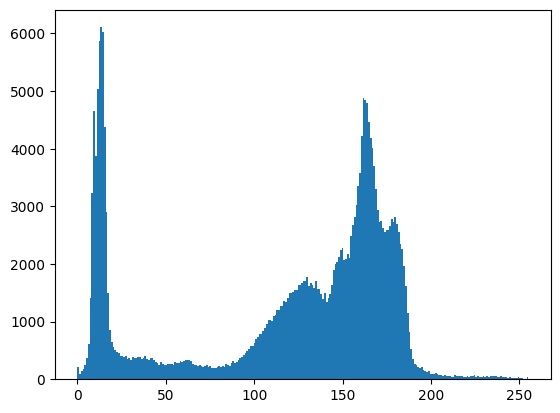

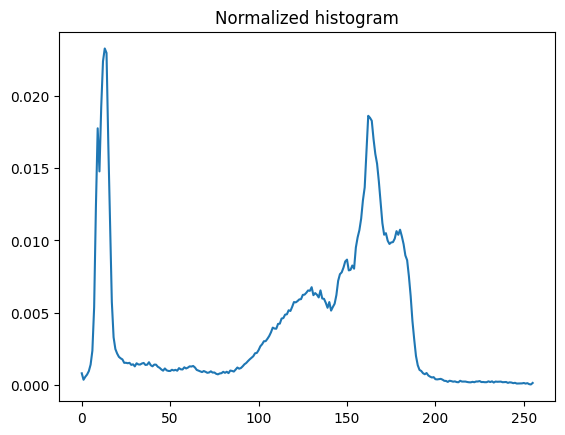

In [5]:
from matplotlib import pyplot as plt

## -- Your code here -- ##

plt.hist(im.ravel(),256,[0,255],False,None)


h = [0 for v in range(256)]

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        h[im[i,j]] += 1
        
        
# plt.figure()
# plt.title("histo")
# plt.plot(h)
# plt.show()

sum = np.sum(h)
for i in range(len(h)):
    h[i] = h[i]/sum
plt.figure()
plt.title("Normalized histogram")
plt.plot(h)
plt.show()

Can you use the histogram to answer the following questions ? (you don't need to code anything here)

1. What is the average gray value of the cameraman ?
1. What is the average gray value of the sky ?
1. Is there more 'cameraman' pixels than 'sky' pixels ?

Compute and plot the **cumulated histogram**.

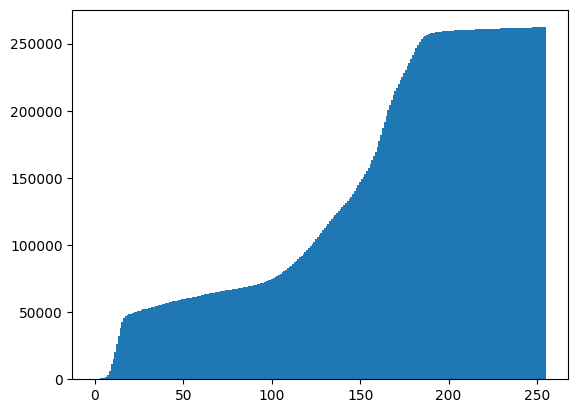

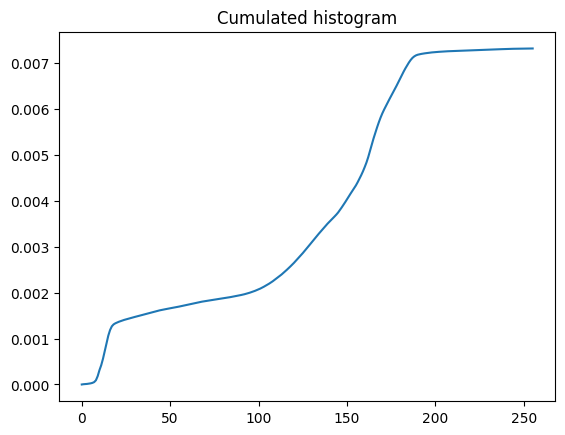

In [6]:

## -- Your code here -- ##
plt.hist(im.ravel(),256,[0,255],False,None,True)

k = [0 for v in range(256)]

for l in range(255):
    k[l+1] = k[l] + h[l]

sum = np.sum(k)
for i in range(len(k)):
    k[i] = k[i]/sum
plt.figure()
plt.title("Cumulated histogram")
plt.plot(k)
plt.show()

**Need more help? You can check the following videos:**

* [Computing a greyscale histogram](https://www.youtube.com/watch?v=g6hkHQbwB0I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=3)
* [Numpy arrays: operations, indexing, masking](https://www.youtube.com/watch?v=rPNTkrM2dZw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=4&t=253s)
* [Normalized and cumulative histograms](https://www.youtube.com/watch?v=uCgu0-KZt1o&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=5)

## 3. Image entropy

The "entropy" of a signal, in information theory, can generally be interpreted as the "number of bits required to encode the signal". It is a measure of the "amount of information" contained in the signal. Intuitively, a signal with a very narrow distribution (all values are close to each other) will have a very low entropy, while a signal with a wide distribution (the values are evenly distributed) will have a higher entropy.

1. Compute the image entropy of the cameraman image. The image entropy is given by $e = - \sum_{g=0}^N p(g) \log_2(p(g))$ where $p(g)$ is the probability that a pixel has the grayscale value g, and N is the number of possible grayscale values. Note that p(g) is directly given by the normalized histogram.
1. What is the entropy of a shuffled version of the cameraman ?

In [7]:
    
# -- Your code here -- #
sum = 0
for i in range(256):
    sum = sum + h[i]*np.log2(h[i])

e = -1*sum 
print("L'entropie est de :", e)
#Entropy of the shuffled version is the same as the pixed are only mixed. probability of appearance won't change

L'entropie est de : 7.065452040742872


**Need more help? You can check the following videos:**

* [Computing the image entropy](https://www.youtube.com/watch?v=L2VtGt2FsRQ&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=6)

## 4. Image compression

Using the code below as a starting point:

* **Decompose an image** by recursively subsampling its dimensions and computing the remainders, such that each level of recursion performs the following operation:

<img src='PyramidCompression.png' width='75%'/>

Hey


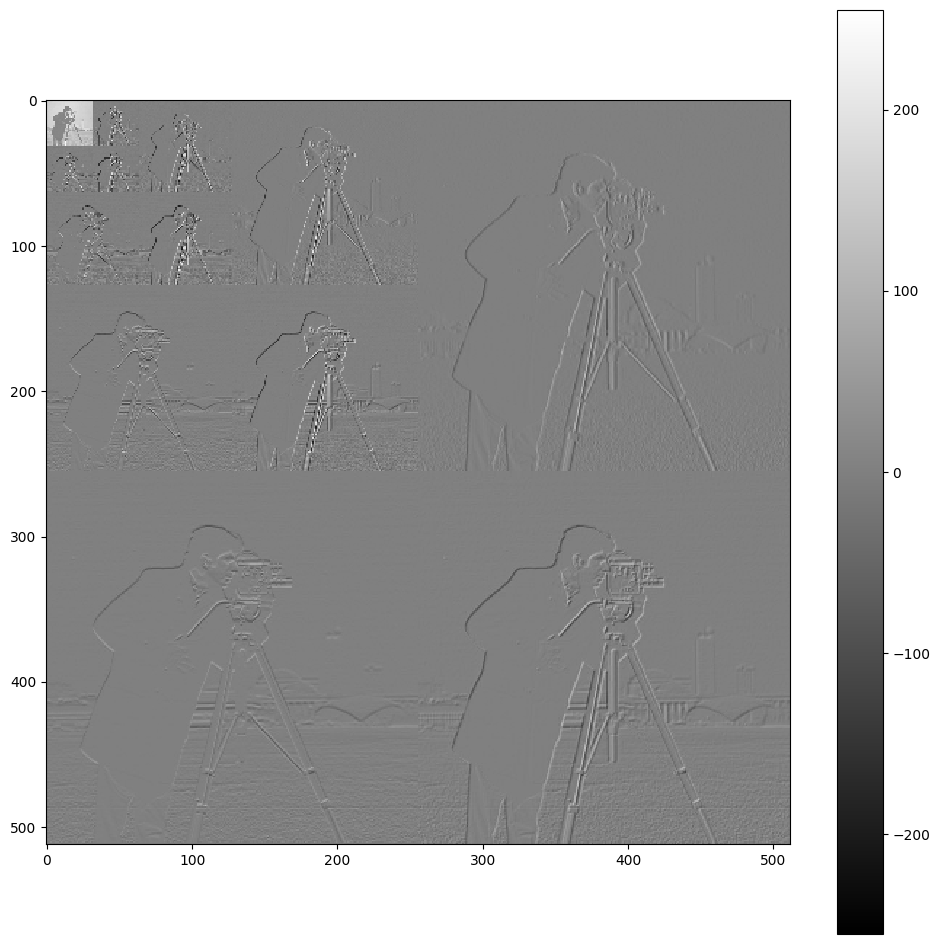

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread

# Modify this method:
def split(im):
    a = im[0:-1:2,0:-1:2] 
    b = im[0:-1:2,1::2] - a
    c = im[1::2,0:-1:2] - a
    d = im[1::2,1::2] - a
    
    R = np.vstack((np.hstack((a,b)),np.hstack((c,d))))
    return R

def deconstruct_rec(im, n, cpt = 0):
    if n == 0: 
        return im

    first = im[0:-1:2,0:-1:2] 
    b = im[0:-1:2,1::2] - first
    c = im[1::2,0:-1:2] - first
    d = im[1::2,1::2] - first
    
    if(n-1 == cpt): 
        a = first
        print('Hey')
    else: 
        cpt = cpt+1
        a = deconstruct_rec(first,n,cpt)

 
   
    R = np.hstack((c,d))
    R = np.vstack((np.hstack((a,b)),np.hstack((c,d))))
    return R
n = 4
im = imread('camera.jpg').astype(np.int16) # cast the camera image as a signed integer to avoid overflow

s = deconstruct_rec(im, n)

        
   

plt.figure(figsize=(12,12))
# interpolation='nearest' -> don't try to interpolate values between pixels if the size of the display is different from the size of the image
# cmap=cm.gray -> display in grayscale
# vmin=-255 -> set "black" as -255
# vmax=255 -> set "white" as 255
plt.imshow(s,interpolation='nearest',cmap=cm.gray,vmin=-255, vmax=255)
plt.colorbar()

plt.show()

**Compute how the image entropy evolves** with regards to the level of decomposition

L'entropie est de : 2.0190360745619835


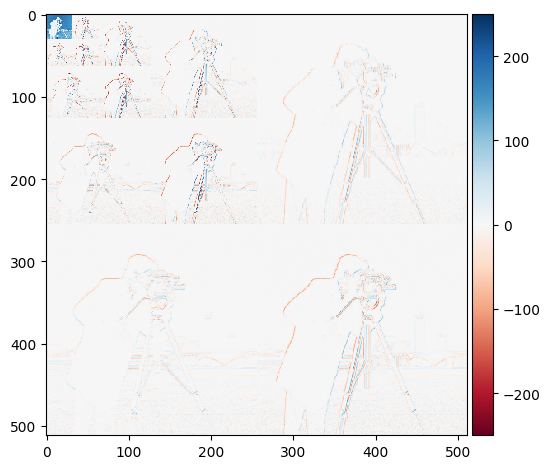

In [9]:


# -- Your code here -- #

imshow(s)

a = [0 for v in range(512)]
for i in range(s.shape[0]):
    for j in range(s.shape[1]):
        a[s[i,j]+256] += 1
        
sum = np.sum(a)
for i in range(len(a)):
    a[i] = a[i]/sum
        
som = 0
for l in range(256):
    if(a[l] != 0):
        som = som + a[l]*np.log2(a[l])

e = -1*som 
print("L'entropie est de :", e) 

    

**Rebuild the original image** from the pyramid (allowing the selection the level of recursion)

512 256


C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


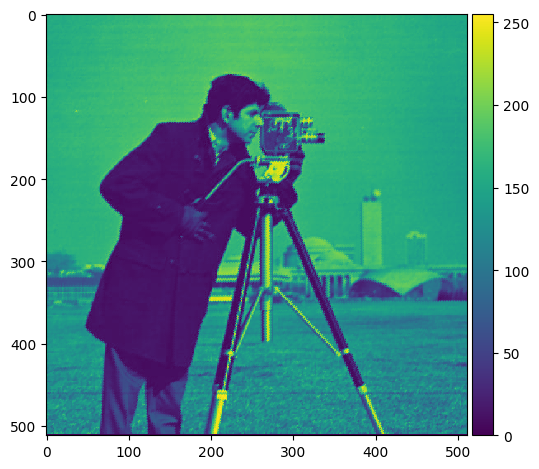

In [10]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread,imshow

# Modify this method:
def deconstruct_rec(im, n, cpt = 0):
    if n == 0: 
        return im

    first = im[0:-1:2,0:-1:2] 
    b = im[0:-1:2,1::2] - first
    c = im[1::2,0:-1:2] - first
    d = im[1::2,1::2] - first
    
    if(n-1 == cpt): 
        a = first
    else: 
        cpt = cpt+1
        a = deconstruct_rec(first,n,cpt)

 
   
    R = np.hstack((c,d))
    R = np.vstack((np.hstack((a,b)),np.hstack((c,d))))
    return R


def reconstruct_rec(im, n, cpt = 0):
    
    if n == 0:
        return im

    mid = int(len(im)/2)
    first = im[0:mid,0:mid]
    b_a = im[mid:2*mid,0:mid]
    c_a = im[0:mid,mid:2*mid]
    d_a = im[mid:2*mid,mid:2*mid]
    if n == cpt:
        a = first
        return im
    else: 
        cpt = cpt+1
        a = reconstruct_rec(first,n,cpt)
    
    b_ = b_a + a
    c_ = b_a + a
    d_ = d_a + a

    rec_im = np.zeros((2*mid,2*mid))
    k = 0
    l = 0
    print(len(rec_im), len(b_))
    for i in range(2*mid-1):
        for j in range(2*mid-1):
            if (i%2 == 0 and j%2 == 0):
                rec_im[i,j] = a[int(i/2),int(j/2)]
                
            if (i%2 == 0 and j%2 == 1):
                rec_im[i,j] = c_[int(i/2),int(j/2)]
                
            if (i%2 == 1 and j%2 == 0):
                rec_im[i,j] = b_[int(i/2),int(j/2)]
                
            if (i%2 == 1 and j%2 == 1):
                rec_im[i,j] = d_[int(i/2),int(j/2)]              
    
    return rec_im
 

n = 1
im = imread('camera.jpg').astype(np.int16) # cast the camera image as a signed integer to avoid overflow

# -- Your code here -- #

dest_im = deconstruct_rec(im, n)

rec_im = reconstruct_rec(dest_im,n)
    
imshow(rec_im)

**Need more help? You can check the following videos:**

* [Subsampling and rescaling](https://www.youtube.com/watch?v=rYNUby5bIlA&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=7)
* [Pyramid compression](https://www.youtube.com/watch?v=yrsyF8T5OAU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=8)

## 5. Co-occurrence matrix

While the histogram of an image is independent of the position of the pixels, the co-occurrence matrix gives us information about their spatial distribution.

A co-occurrence matrix is computed for a given displacement, looking at the pair of values spatially separated by that displacement. The co-occurrence matrix is a square matrix, its size given by the number of possible values that a pixels can take in the image.

1. Compute de [cooccurrence matrix](https://en.wikipedia.org/wiki/Co-occurrence_matrix) for a chosen displacement $(\Delta x,\Delta y)$ (see [greycomatrix](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycomatrix) in scikit-image)
1. What is the entropy of the cooccurrence matrix ?
1. How does this entropy evolve if we increase the displacement ?

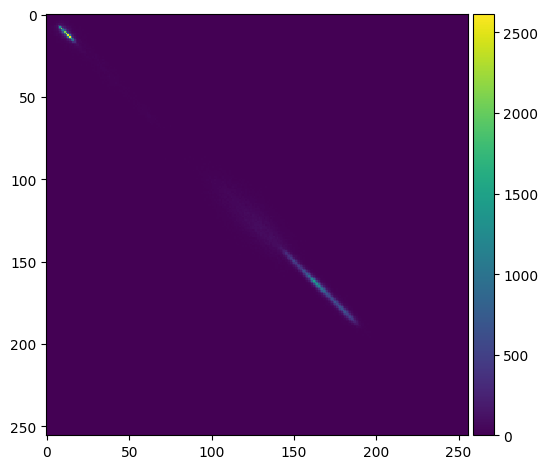

In [11]:
from skimage.feature import greycomatrix

im = imread('camera.jpg').astype(np.int16) 
# -- Your code here -- #

def co_occurence(im, Dx, Dy):
    size = len(im)
    C = np.zeros((256,256))
    for x in range(im.shape[0]-Dx):
        for y in range(im.shape[1]-Dy):
            i = im[x,y]
            j = im[x+Dx,y+Dy]
            C[i,j] += 1
                        
    return C


Dx = 1 
Dy = 1
co_oc = co_occurence(im, Dx, Dy)
imshow(co_oc)
    

**Need more help? You can check the following videos:**

* [Grayscale co-occurence matrix](https://www.youtube.com/watch?v=cq0Br3zB2AU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=9)

## 6. Colour representations

A colour image is typically encoded with three channels: Red, Green and Blue. In the example below, we open the *immunohistochemistry()* example image and split it into the three channels, which we display: 

(512, 512, 3) uint8


<Figure size 640x480 with 0 Axes>

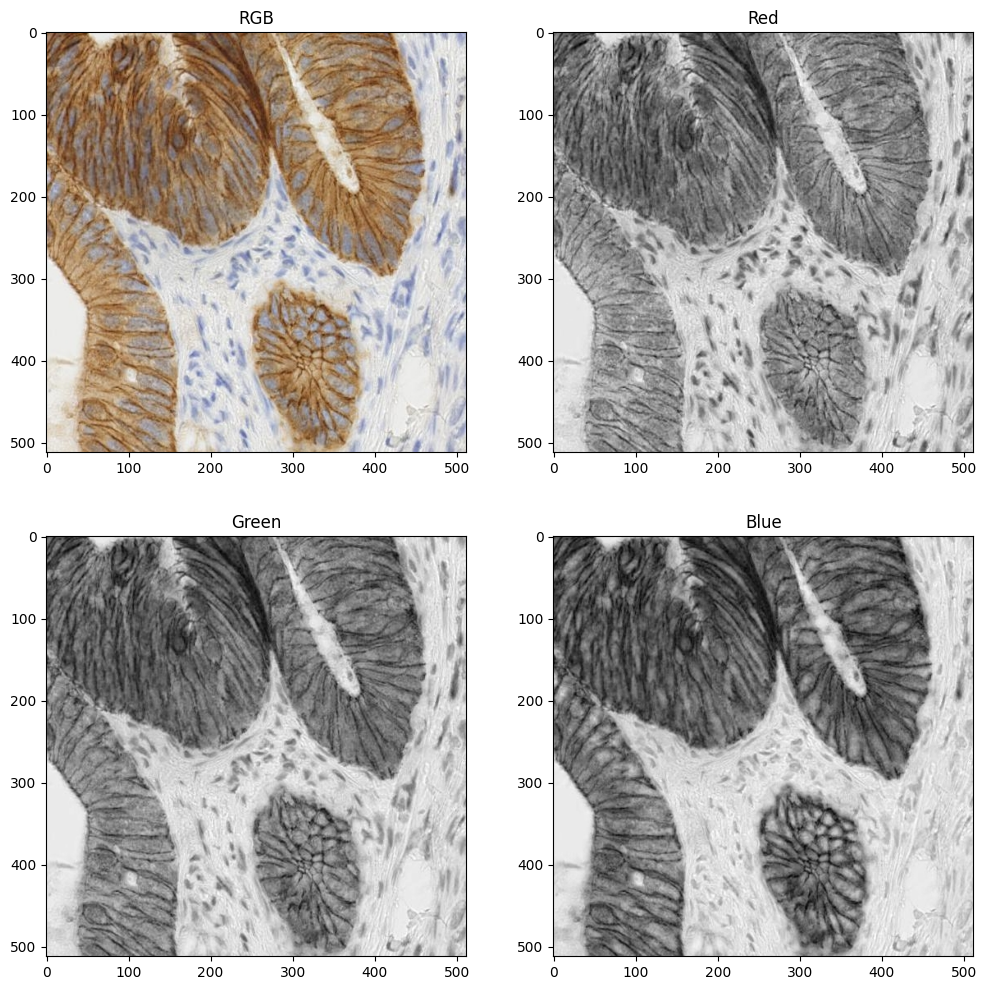

In [12]:
from skimage.data import immunohistochemistry

im = immunohistochemistry() # scikit-image method to load the example image
print(im.shape,im.dtype)
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

plt.gray() # Use grayscale by default on 1-channel images, so you don't have to add cmap=plt.cm.gray everytime

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(im)
plt.title('RGB')
plt.subplot(2,2,2)
plt.imshow(r)
plt.title('Red')
plt.subplot(2,2,3)
plt.imshow(g)
plt.title('Green')
plt.subplot(2,2,4)
plt.imshow(b)
plt.title('Blue')
plt.show()

1. Compute & show the color histograms
1. Convert the image to the HSV color space & compute the HSV histograms. [See the skimage documentation for reference on color transformation](http://scikit-image.org/docs/dev/api/skimage.color.html#rgb2hsv)
1. Find a method to isolate the brown cells in the immunohistochemistry image
    1. In the RGB space
    1. In the HSV space

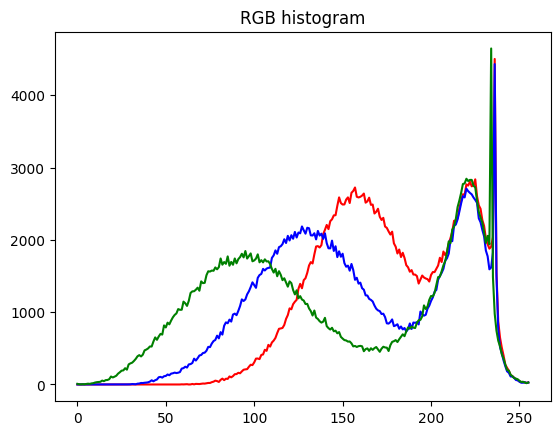

In [13]:

# -- RGB Histogram -- #
r_hist = np.zeros(256)
g_hist = np.zeros(256)
b_hist = np.zeros(256)
for x in range(im.shape[0]):
    for y in range(im.shape[1]):
        r_hist[im[x,y,0]] += 1        
        g_hist[im[x,y,1]] += 1   
        b_hist[im[x,y,2]] += 1       


plt.figure()
plt.title("RGB histogram")
plt.plot(r_hist,'r',)
plt.plot(g_hist, 'b')
plt.plot(b_hist, 'g')
plt.show()

110.43529411764706


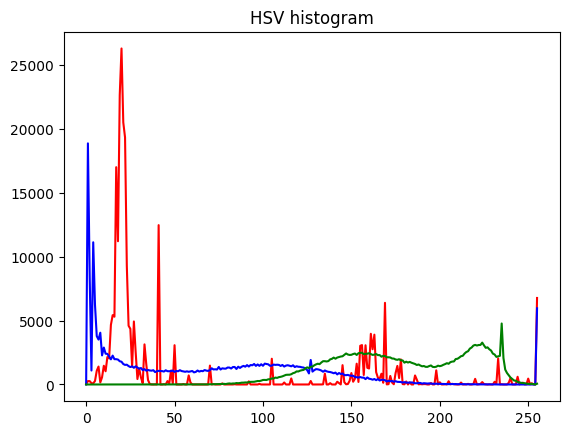

In [14]:
import skimage
# -- Convert to HSV -- #

im = skimage.data.immunohistochemistry() # scikit-image method to load the example image
HSV_im = skimage.color.rgb2hsv(im)

HSV_im *= 256 # resize it similarly to the RGB (from 0 to 256)
HSV_im -= 1

print(HSV_im[10,10,2])
h_hist = np.zeros(256)
s_hist = np.zeros(256)
v_hist = np.zeros(256)


for x in range(HSV_im.shape[0]-1):
    for y in range(HSV_im.shape[1]-1):
        h_hist[int(HSV_im[x,y,0])] += 1        
        s_hist[int(HSV_im[x,y,1])] += 1   
        v_hist[int(HSV_im[x,y,2])] += 1       


plt.figure()
plt.title("HSV histogram")
plt.plot(h_hist,'r',)
plt.plot(s_hist, 'b')
plt.plot(v_hist, 'g')
plt.show()


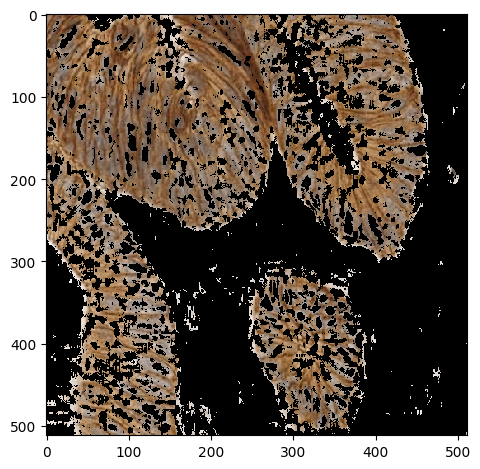

In [15]:
# -- Isolate brown pixels, in HSV -- #

#First I have to find the value corresponding to brown, from the internet I find 30° (30/360 as our values are from 0 to 1)
#We will take a 20% margin on the hew, that should select the brownest part 


im = immunohistochemistry() # scikit-image method to load the example image
HSV_im = skimage.color.rgb2hsv(im)

br = 25/360
tol = .30
brown = np.zeros(HSV_im.shape)
# RGB_im = skimage.color.hsv2rgb(brown)
# imshow(RGB_im)
for x in range(HSV_im.shape[0]):
    for y in range(HSV_im.shape[1]):
        if(HSV_im[x,y,0] < (1 + tol)*br and HSV_im[x,y,0] > (1 - tol)*br):
            brown[x,y,:] = HSV_im[x,y,:]


RGB_im = skimage.color.hsv2rgb(brown)
imshow(RGB_im)


**Need more help? You can check the following videos:**

* [RGB vs HSV](https://www.youtube.com/watch?v=oVpSTZtZQNM&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=10)
* [Distances: image space and colour space](https://www.youtube.com/watch?v=f6aJJldc38E&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=11)
* [Creating a Magic Wand](https://www.youtube.com/watch?v=Aw--_cJ7o5I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=12)

# Coding Project - Watermark

Write code to automatically add a watermark to a photograph.

<img src='ex_wm.jpg' width="500px" />

## Main requirements

The minimum requirements are to:
* Add the white pixels from the watermark somewhere in the photograph.
* Save the resulting image as an image file & display it in the notebook

You may use the *watermark.png* file available in the GitHub repository, or choose/create your own.

## Additional requirements

(note: this is not an exhaustive list, use your imagination!)

* Add an option to choose the watermark location
* Add transparency effect to the watermark
* Determine if the watermark should be dark or light based on the luminosity of the image
* ...


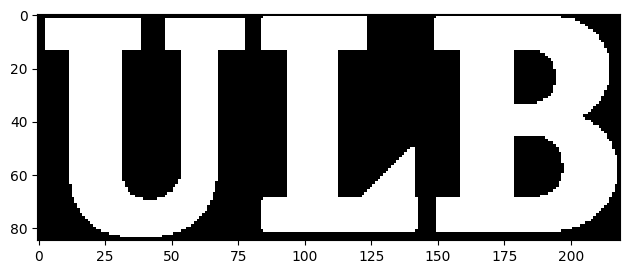

In [3]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import skimage
from skimage.io import imread,imshow

        # -- Your code here -- #

#Initialisation 
im = imread('etretat.jpg')
wm = imread('watermark.png')
imshow(wm)
HSV_im = skimage.color.rgb2hsv(im)

#Variable 
margin = 50

def add_mark(im,wm,posX,posY):
        if(posX > im.shape[0] - wm.shape[0] and posY > im.shape[1]- wm.shape[1] ):
                print('Position non conforme (hors image)')
                


